# Text classification

--------------------------------------------------------------------------------------------------------------------

+ note that : the file containing the text book must be in the same directory with the notebook at the same level

---------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd  # for manibulating the data
import re   # for regular expression
import string 
from collections import Counter  # to get the most common words in a string 
import nltk  # to remove stop words 
#nltk.download('stopwords')

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def readBooks(bookLst):
    "this function return a list of book that you have already given it its names as a parameter"
    # so it return list of lists_of sentences 
    data = []
    for b in bookLst:
        with open(b+".txt",encoding = "ISO-8859-1") as f:
            data.append (f.readlines())
    return data

In [3]:
def compineToParagraph(list_of_text):
    "Takes a list of statments and combines them into one large chunk of text"
    paragraph = ' '.join(list_of_text)
    return paragraph

In [4]:
def toListOfBooks(lstOfSentences):
    "it takes a list os list_of_sentences and return a list of strings"
    txtBooks =[]
    for i in lstOfSentences :
        txtBooks.append(compineToParagraph(i))
    return txtBooks

In [5]:
def clean_text(text):
    '''
    Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.
    Get rid of some additional punctuation and non-sensical text
    '''
    
    text = text.lower()  # Make text lowercase
    text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation 
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('[‘’“”…]', '', text) # Get rid of some additional punctuation 
    text = re.sub('\n', '', text)   
    return text

In [6]:
def toCleanListOfBooks(lstOfDirtyBooks):
    cleanedBooks =[]
    for i in lstOfDirtyBooks :
        cleanedBooks.append(clean_text(i))
    return cleanedBooks

In [7]:
def getPart(txt,bookName,start,end,words):
    """
    it extract a specific paragraph from a large text depending on a starting and ending indexs ,
    it return Book_name and the part
    """
    lst1 = txt.split() 
    l2=[]
    c = 0
    for i in range(start,end+1):
        if c<words:
            l2.append(lst1[i])
            c+=1
        else :
            txtPart = compineToParagraph(l2)
            return bookName,txtPart


In [8]:
def divideBooks(lstOfBookNames,lstOfCleanedBooks,lstOfPartitions,numberOfWords):
    parts =[]
    bookNames = []
    for m in range(len(lstOfBookNames)):
        str1= lstOfCleanedBooks[m] # to get the text from the book 
        bookName = lstOfBookNames[m]    # to get the book name
        start = 0  # from word zero 
        end = numberOfWords  # to word 100 
        for i in range(lstOfPartitions[m]):
            bookName,part = getPart(str1,bookName,start,end,numberOfWords)
            parts.append(part)
            bookNames.append(bookName)
            start += numberOfWords
            end += numberOfWords  
    return parts , bookNames

In [9]:
def dividLstOfBooksIntoParts (namesLst,partitionsLst,numberOfwords):
    '''
    namesLst : list of book names to read 
    partitionsLst : number of required partitions from each book 
    numberOfwords : number of words in each part
    it return a dataFrame containing the text and the label
    '''
    bookNamesLst = namesLst  # list of book names 
    bookLst = readBooks(bookNamesLst)  # list of list_of_sentence
    txtBooks =toListOfBooks(bookLst)   # list of strings
    cleanedBooks = toCleanListOfBooks(txtBooks)  # list of cleaned strings 
    

    #remove stop word in each book 
    cleanedBooks= removeStopWords(cleanedBooks)
    
    #visuaizing each book words
    visualize2(cleanedBooks,bookNamesLst)
    
    #print the most common word in each book 
    mostCommon(cleanedBooks,bookNamesLst)
    
    parts , bookNames=divideBooks(bookNamesLst,cleanedBooks,partitionsLst,numberOfwords)
    book_names = pd.Series(bookNames)
    text = pd.Series(parts)
    df = pd.DataFrame({ 'text': text,'book_names': book_names })
    
    # shuffle the rows of a dataframe
    shuffled = df.sample(frac=1).reset_index(drop=True)

    return shuffled

In [10]:
def checkNumberOfWords(dframe):
    "it take a dataframe and check number of words in each row and return a new dataFrame"
    df = dframe
    total_list = []
    for i in range(len(df.index)):
        txt = df.iloc[i,0]
        lst = txt.split()
        totals = len(lst)
        total_list.append(totals)

    df['totalWords'] =  total_list
    return df

In [11]:
def mostCommon(bookLst,bookNamesLst):
    "it take a list of books-string- and return most common words"
    for i in range(len(bookLst)):
        print(f"The most common words in book : {bookNamesLst[i]}")
        worsLst = bookLst[i].split() 
        words = [word.lower() for word in worsLst]
        c = Counter(words)
        print(c.most_common(10))


In [12]:
def removeStopWords(bookLst):
    "it take a list of cleaned strings and remove the stop words in each one"
    stopwords = nltk.corpus.stopwords.words('english')
    veryCleaned = []
    for b in bookLst:
        bookWords = b.split()
        words = [word.lower() for word in bookWords if word.lower() not in stopwords]
        book = compineToParagraph(words)
        veryCleaned.append(book)
    return veryCleaned

In [13]:
#!pip install wordcloud
from wordcloud import WordCloud 

def visualize2(bookLst,booksNames):
    for b in range(len(bookLst)):
        print(f"Book : {booksNames[b]}")
        myWordCloud = WordCloud().generate(bookLst[b])
        plt.figure(figsize=(15,10))
        plt.imshow(myWordCloud,interpolation='bilinear')
        plt.axis('off')
        plt.show()

--------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

Book : austensense


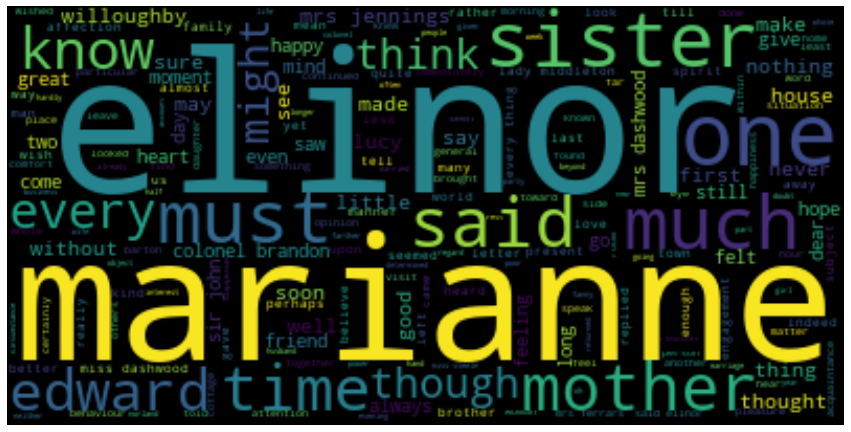

Book : bryantstories


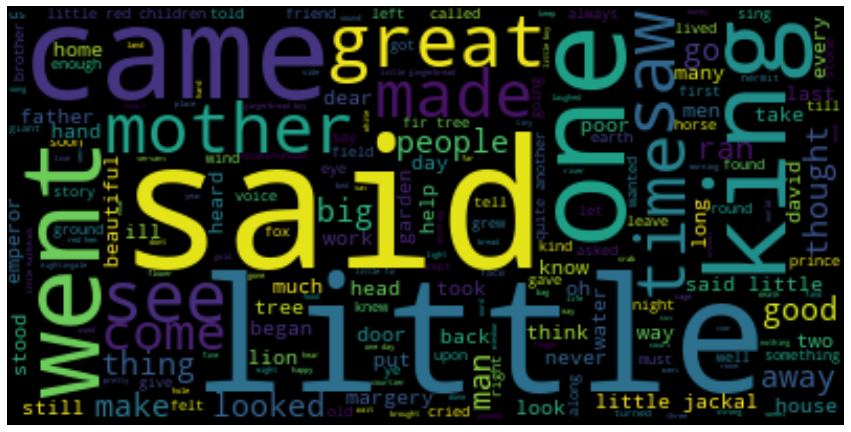

Book : chestertonball


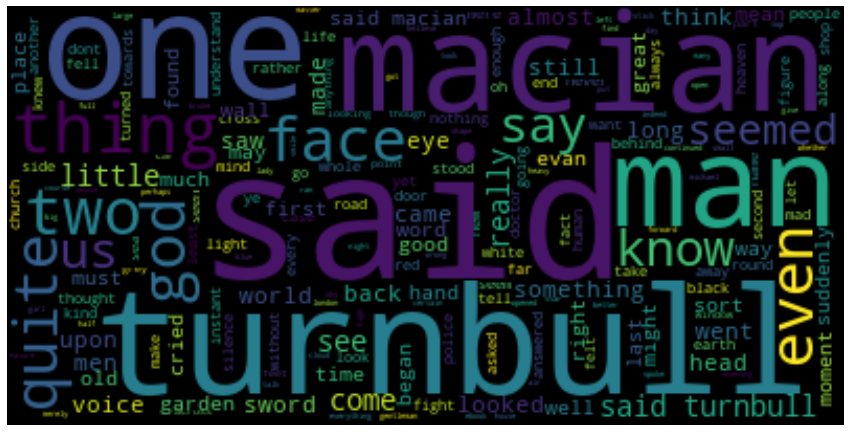

Book : edgeworthparents


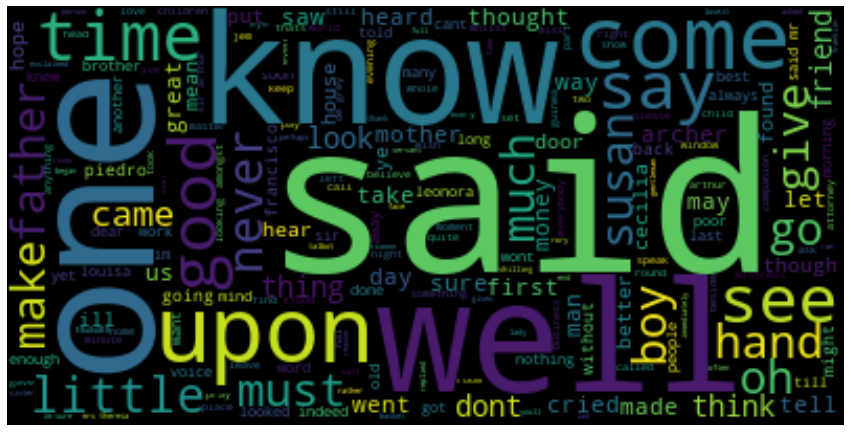

Book : melvillemobydick


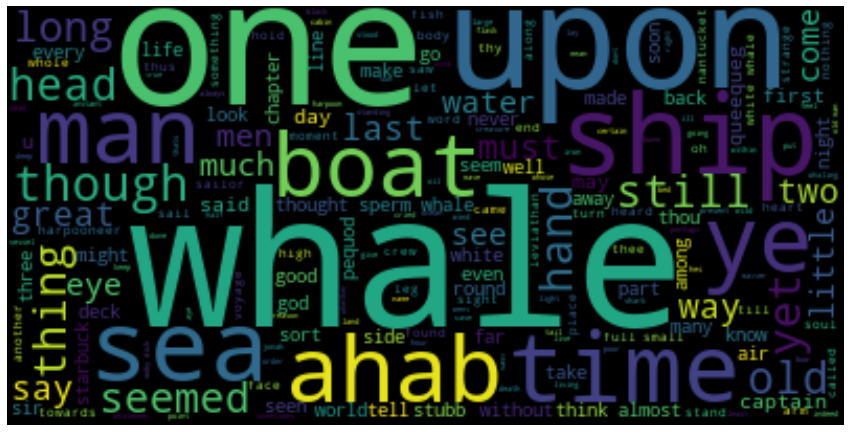

The most common words in book : austensense
[('elinor', 618), ('could', 573), ('mrs', 526), ('would', 514), ('marianne', 490), ('said', 387), ('every', 374), ('one', 317), ('much', 287), ('must', 282)]
The most common words in book : bryantstories
[('little', 597), ('said', 453), ('came', 191), ('one', 181), ('could', 158), ('went', 122), ('king', 117), ('would', 112), ('great', 110), ('old', 102)]
The most common words in book : chestertonball
[('said', 651), ('turnbull', 507), ('macian', 413), ('like', 325), ('man', 316), ('one', 308), ('two', 177), ('us', 159), ('quite', 143), ('would', 140)]
The most common words in book : edgeworthparents
[('said', 1427), ('would', 510), ('one', 481), ('upon', 477), ('mr', 458), ('could', 424), ('know', 416), ('little', 414), ('good', 412), ('well', 399)]
The most common words in book : melvillemobydick
[('whale', 954), ('one', 889), ('like', 575), ('upon', 565), ('old', 440), ('man', 435), ('would', 427), ('ye', 421), ('ahab', 417), ('whales', 38

,text,book_names
0,lines landscape sped simple strict yet swervin...,chestertonball
1,orphans near ruins castle rossmore ireland sma...,edgeworthparents
2,bubbles go puff puff puff go pop pop pop show ...,bryantstories
3,long discovering name ferrars began f prepared...,austensense
4,seen many quaint craft day aught knowsquaretoe...,melvillemobydick
...,...,...
995,take take said tortoise ducks felt sorry last ...,bryantstories
996,would break whats gone love said mother two gu...,edgeworthparents
997,truck come lightfoot old womans countenance fe...,edgeworthparents
998,tutor taught duty hoped secure approbation mis...,edgeworthparents


In [14]:
bookNamesLst = ['austensense','bryantstories','chestertonball','edgeworthparents','melvillemobydick']
df= dividLstOfBooksIntoParts(bookNamesLst,[200,200,200,200,200],100)
# print(df)
# checkNumberOfWords(df)

df

### `bag of words`

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
def getBOW(train_corpus,test_corpus):
    "it take train and test corpus and return train and test features"
    # build BOW features on train articles
    cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
    cv_train_features = cv.fit_transform(train_corpus)
    # transform test articles into features
    cv_test_features = cv.transform(test_corpus)
    return cv_train_features ,cv_test_features

### `Bag of N-Grams Model`

In [16]:
def getNGram(n,train_corpus,test_corpus):
    "it take train and test corpus and return train and test features"
    # build BOW features on train articles
    bv = CountVectorizer(ngram_range=(n,n))
    bv_train_features = bv.fit_transform(train_corpus)
#     bv_train_features = bv_train_features.toarray()
    # transform test articles into features
    bv_test_features = bv.fit_transform(test_corpus)   
    return bv_train_features , bv_test_features

### `TF-IDF Model`

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

def getTF_IDF(train_corpus,test_corpus):
    "it take train and test corpus and return train and test features"
    # build BOW features on train articles
    tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
    tv_train_features = tv.fit_transform(train_corpus)
    # transform test articles into features
    tv_test_features = tv.transform(test_corpus)
    return tv_train_features , tv_test_features

### `word embeding`

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')  
def getWordEmbedding(trainSentences):
    doc = nlp(trainSentences)
    return doc.vector

-------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------

### `splitting the dataset to training and testing dataset`

In [19]:
# to split the dataset to training and testing dataset 
from sklearn.model_selection import train_test_split

x = df.text
y = df.book_names

#  Split the Dataset
X_train_corpus,X_test_corpus,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


### `label encoding the book names`

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()

y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

### `feature extraction`

In [21]:
cv_train_features , cv_test_features = getBOW(X_train_corpus,X_test_corpus)
tv_train_features , tv_test_features = getNGram(2,X_train_corpus,X_test_corpus)
bv_train_features , bv_test_features = getTF_IDF(X_train_corpus,X_test_corpus)

print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('NGram model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)
print('TFIDF model:> Train features shape:', bv_train_features.shape, ' Test features shape:', bv_test_features.shape)

BOW model:> Train features shape: (700, 11798)  Test features shape: (300, 11798)
NGram model:> Train features shape: (700, 61169)  Test features shape: (300, 27492)
TFIDF model:> Train features shape: (700, 11798)  Test features shape: (300, 11798)


In [22]:
type(X_train_corpus)


pandas.core.series.Series

## `modeling`

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

### `naive_bayes`

In [24]:
from sklearn.naive_bayes import MultinomialNB
def NAIVE_BAYES(train_features,y_train,K_FOLD):
    """ 
    it takes the traing features and label and return as output:
    the means of accuracies and variance of accuracies of the cross validation process  
    and it also return the model itself 
    """
    mnb = MultinomialNB(alpha=1)

    mnb.fit(train_features, y_train)

    mnb_bow_cv_scores = cross_val_score(mnb, train_features, y_train, cv=K_FOLD)
    
    mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)
    mnb_bow_cv_variace_score = np.std(mnb_bow_cv_scores)
    
    print(f"CV Accuracy ({K_FOLD}-fold):")
    print(mnb_bow_cv_scores)
#     print('Mean CV Accuracy:', mnb_bow_cv_mean_score)
#     print('vaiance CV Accuracy :',mnb_bow_cv_variace_score)
#     mnb_bow_test_score = mnb.score(cv_test_features, y_test)
#     print('Test Accuracy:', mnb_bow_test_score)
    return mnb,mnb_bow_cv_mean_score , mnb_bow_cv_variace_score
    

In [25]:
mnb_CV , Means_Accuracies_CV ,Variance_accuracies_CV = NAIVE_BAYES(cv_train_features,y_train,10)

CV Accuracy (10-fold):
[0.98571429 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [26]:
mnb_tv , Means_Accuracies_TV ,Variance_accuracies_TV = NAIVE_BAYES(tv_train_features,y_train,10)

CV Accuracy (10-fold):
[0.88571429 0.91428571 0.87142857 0.87142857 0.94285714 0.9
 0.85714286 0.95714286 0.92857143 0.85714286]


In [27]:
mnb_bv , Means_Accuracies_BV ,Variance_accuracies_BV = NAIVE_BAYES(bv_train_features,y_train,10)

CV Accuracy (10-fold):
[0.97142857 0.98571429 1.         0.98571429 0.98571429 0.97142857
 1.         1.         1.         1.        ]


In [28]:
pd.DataFrame([['BOW',Means_Accuracies_CV,Variance_accuracies_CV],
              ['TF_IDF',Means_Accuracies_BV,Variance_accuracies_BV],
              ['NGRAM',Means_Accuracies_TV,Variance_accuracies_TV]],
             columns=['','Means_OF_Accuracies', 'Variance_OF_accuracies']
            ).T

,0,1,2
,BOW,TF_IDF,NGRAM
Means_OF_Accuracies,0.998571,0.99,0.898571
Variance_OF_accuracies,0.00428571,0.0111575,0.0340767


### `logistic regression`

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(cv_train_features, y_train)

lr_bow_cv_scores = cross_val_score(lr, cv_train_features, y_train, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)

print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)

lr_bow_test_score = lr.score(cv_test_features, y_test)
print('Test Accuracy:', lr_bow_test_score)

CV Accuracy (5-fold): [0.97142857 0.97857143 0.98571429 0.99285714 0.98571429]
Mean CV Accuracy: 0.9828571428571429
Test Accuracy: 0.9733333333333334


### `random forest classifier`

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(cv_train_features, y_train)

rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, y_train, cv=5)
rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)

print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score)

rfc_bow_test_score = rfc.score(cv_test_features, y_test)
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.85714286 0.84285714 0.80714286 0.86428571 0.86428571]
Mean CV Accuracy: 0.8471428571428572
Test Accuracy: 0.81


### `GradientBoostingClassifier`

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(cv_train_features, y_train)

gbc_bow_cv_scores = cross_val_score(gbc, cv_train_features, y_train, cv=5)
gbc_bow_cv_mean_score = np.mean(gbc_bow_cv_scores)
gbc_bow_cv_variance_score = np.std(gbc_bow_cv_scores)

print('CV Accuracy (5-fold):', gbc_bow_cv_scores)
print('Mean CV Accuracy:', gbc_bow_cv_mean_score)

gbc_bow_test_score = gbc.score(cv_test_features, y_test)
print('Test Accuracy:', gbc_bow_test_score)

CV Accuracy (5-fold): [0.87142857 0.88571429 0.92857143 0.92857143 0.88571429]
Mean CV Accuracy: 0.9
Test Accuracy: 0.86


In [32]:
gbc_bow_cv_variance_score

0.023904572186687893

In [33]:
# pd.DataFrame([['Naive Bayes', mnb_bow_cv_mean_score, mnb_bow_test_score],
#               ['Logistic Regression', lr_bow_cv_mean_score, lr_bow_test_score],
#               ['Random Forest', rfc_bow_cv_mean_score, rfc_bow_test_score],
#               ['Gradient Boosted Machines', gbc_bow_cv_mean_score, gbc_bow_test_score]],
#              columns=['Model', 'CV Score (TF)', 'Test Score (TF)'],
#              ).T

In [34]:
import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy
def visualizePOS_forWrongStatments(d):
    doc = nlp(d)
    options={'distance':110,'compact':'True', 'color':'white','bg':'#FF5733','font':'Times'}
    displacy.render(doc, style='dep',options=options)
    


In [46]:
doc = 'love programm'
visualizePOS_forWrongStatments(doc)

In [36]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [37]:
def getVectors(X_train_corpus):
    docs_vectors = pd.DataFrame() 
    for doc in X_train_corpus: # looping through each document 
        doc_vector = nlp(doc).vector
        docs_vectors = docs_vectors.append(pd.Series(doc_vector), ignore_index = True) 
    return docs_vectors


In [38]:
train_vectors = getVectors(X_train_corpus)
test_vectors = getVectors(X_test_corpus)

In [39]:
train_vectors.shape

(700, 96)

In [40]:
test_vectors.shape

(300, 96)

In [41]:
lr = LogisticRegression(penalty='l2', max_iter=200, C=1, random_state=42)
lr.fit(train_vectors, y_train)

lr_bow_cv_scores = cross_val_score(lr, train_vectors, y_train, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)

print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)

lr_bow_test_score = lr.score(test_vectors, y_test)
print('Test Accuracy:', lr_bow_test_score)

CV Accuracy (5-fold): [0.74285714 0.67142857 0.63571429 0.69285714 0.73571429]
Mean CV Accuracy: 0.6957142857142857
Test Accuracy: 0.7066666666666667


In [42]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(train_vectors, y_train)

rfc_bow_cv_scores = cross_val_score(rfc, train_vectors, y_train, cv=5)
rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)

print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score)

rfc_bow_test_score = rfc.score(test_vectors, y_test)
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.57857143 0.49285714 0.39285714 0.51428571 0.48571429]
Mean CV Accuracy: 0.4928571428571429
Test Accuracy: 0.52


==================================================================================================================

### References

1. lecture notes 
2. toutorial notes 
3. https://www.youtube.com/watch?v=xvqsFTUsOmc 
4. Sarkar, Dipanjan. Text Analytics with Python : a Practitioner’s Guide to Natural Language Processing. Second edition., Apress, 2019, https://doi.org/10.1007/978-1-4842-4.
